In [88]:
# at first, we analyze the word frequency distribution
with open('rawdata/aesw2016(v1.2)_train.tok') as f:
    tokens = []
    lens = []
    for line in f:
        tokens.extend(line.split('\t')[2].split(' '))
        lens.append(len(line.split('\t')[2].split(' ')))

from collections import Counter
cnt = Counter(tokens)
freq = list(cnt.values())
sorted_freq = sorted(freq, reverse=True)
len(sorted_freq)

213873

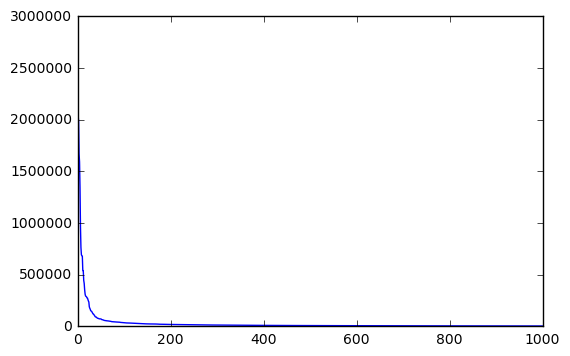

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(sorted_freq[:1000])

In [39]:
from collections import defaultdict

def datacoverage_over_threshold(freq):
    # sort the freq
    sorted_freq = sorted(freq, reverse=True)
    
    # count threshold and proportion
    wcnt_wrt_freq = defaultdict(int) # the number of word count with certain freq
   
    for i, f in enumerate(sorted_freq):
        wcnt_wrt_freq[f] += f

    wcnt_sum_tuple = sorted(wcnt_wrt_freq.items(), key=lambda x: x[0], reverse=True)
    wcnt_sum_values = [x[1] for x in wcnt_sum_tuple]
    threshold = [x[0] for x in wcnt_sum_tuple]
    wcnt_over_threshold = np.cumsum(wcnt_sum_values)
    wportion_over_threshold = wcnt_over_threshold / np.sum(wcnt_sum_values)
    
    return threshold, wportion_over_threshold


def wordcoverage_over_threshold(freq):
    # sort the freq
    sorted_freq = sorted(freq, reverse=True)
    
    tcnt_wrt_freq = defaultdict(int) # the number of words with the same freq
    
    for i, f in enumerate(sorted_freq):
        tcnt_wrt_freq[f] += 1
    
    tcnt_sum_tuple = sorted(tcnt_wrt_freq.items(), key=lambda x: x[0], reverse=True)
    tcnt_sum_values = [x[1] for x in tcnt_sum_tuple]
    threshold = [x[0] for x in tcnt_sum_tuple]
    tcnt_over_threshold = np.cumsum(tcnt_sum_values)
    tportion_over_threshold = tcnt_over_threshold / np.sum(tcnt_sum_values)
    
    return threshold, tportion_over_threshold
    
#print(threshold[-100:])
#print(wportion_over_threshold[-100:])
#print(tportion_over_threshold[-100:])

In [85]:
thresholds, wportion_over_threshold = datacoverage_over_threshold(freq)
thresholds, tportion_over_threshold = wordcoverage_over_threshold(freq)

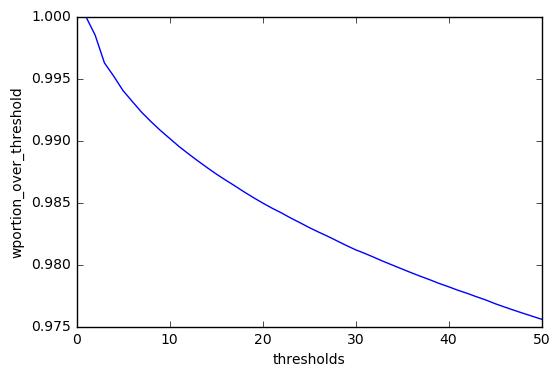

In [86]:
plt.plot(thresholds[-50:], wportion_over_threshold[-50:])
plt.xlabel('thresholds')
plt.ylabel('wportion_over_threshold')

In [74]:
idx = -34
print(wportion_over_threshold[idx])
print(tportion_over_threshold[idx])
print(thresholds[dx])

0.979941854897
0.106020862849
34


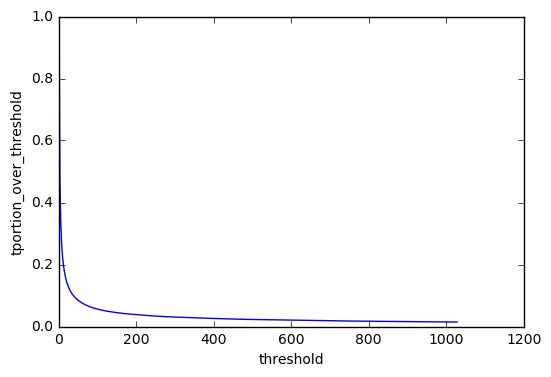

In [45]:
plt.plot(thresholds[-1000:], tportion_over_threshold[-1000:])
plt.xlabel('thresholds')
plt.ylabel('tportion_over_threshold')

In [48]:
import pickle as pkl
from nltk.tokenize import word_tokenize as wt

# tokenize from raw data
with open('procdata/train.ext.pkl', 'rb') as f:
    samples = pkl.load(f)
    #rwords = [w for sample in samples for w in wt(sample['rtext'])]
    #wwrods = [w for sample in samples for w in wt(sample['wtext'])]
    dwords = [w for sample in samples for d in sample['dels_wrt_wtext'].values() for w in wt(d)]

In [87]:
with open('deleted_words.pkl', 'wb') as f:
    pkl.dump(dwords, f)

476804


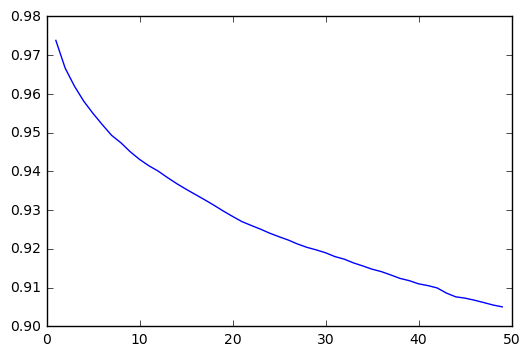

In [83]:
print(len(dwords))

thresholds = np.arange(1, 50)
covered_by_selected = []
for threshold in thresholds:
    selected_words = set([w[0] for w in cnt.items() if w[1] > threshold])
    covered_by_selected.append(np.sum([1 for w in dwords if w in selected_words])/len(dwords))
    
plt.plot(thresholds, covered_by_selected)

(array([  2.25000000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([   2.        ,    2.28648165,    2.57296329, ...,  321.42703671,
         321.71351835,  322.        ]),
 <a list of 1117 Patch objects>)

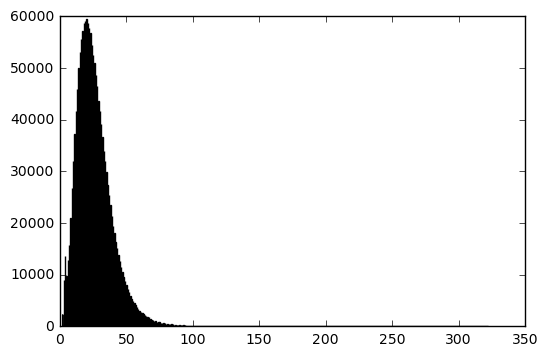

In [89]:
# see the length distribution
plt.hist(lens, bins='auto')